In [86]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from functools import reduce

In [4]:
#reading files
fifa_data = pd.read_csv('fifa.csv')
fifa_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#dropping unnecessary columns
fifa_data = fifa_data.drop(['Photo','Flag','Club Logo','Jersey Number'], axis = 1)

In [6]:
#REMOVING € SYMBOL FROM THE COLUMS CONTAINING CURRENCIES
fifa_data['Value']=fifa_data['Value'].str.replace('€','')
fifa_data['Wage']=fifa_data['Wage'].str.replace('€','')
fifa_data['Release Clause']=fifa_data['Release Clause'].str.replace('€','')

In [7]:
fifa_data.head(1000)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72M,260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93M,340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67M,420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80M,455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51M,380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68M,94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5M


In [8]:
#FUNCTION TO CONVERT CURRENCIES TO FLOAT
def value_to_float(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1000
       
    if 'M' in x:
        return float(x.replace('M', '')) * 1000000

In [9]:
fifa_data['Value']=fifa_data['Value'].apply(value_to_float)
fifa_data['Wage']=fifa_data['Wage'].apply(value_to_float)



In [10]:
fifa_data=fifa_data[pd.notnull(fifa_data['Release Clause'])]
#fifa_data['Release Clause'].fillna()
fifa_data.head(1000)
fifa_data['Release Clause']=fifa_data['Release Clause'].apply(value_to_float)

In [11]:
fifa_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [12]:
#CONVERTING DAE TO DATETIME TYPE
fifa_data['Joined'] = fifa_data['Joined'].apply(lambda x: pd.to_datetime(x).strftime('%Y'))
#fifa_data['Joined'].head()


In [13]:
fifa_data['Joined'] = pd.to_numeric(fifa_data['Joined'])

In [14]:
fifa_data['Contract Valid Until'] = fifa_data['Contract Valid Until'].apply(lambda x: pd.to_datetime(x).strftime('%Y'))

In [15]:
#fifa_data['Joined']
#fifa_data['Contract Valid Until']

In [16]:
#CONVERING HEIGHT TO INTEGER TYPE
fifa_data['Height']=fifa_data['Height'].str.replace("'",".").astype(float)
fifa_data['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
5        5.80
6        5.80
7        6.00
8        6.00
9        6.20
10       6.00
11       6.00
12       6.20
13       5.80
14       5.60
15       5.10
16       6.20
17       5.90
18       6.20
19       6.60
20       6.20
21       6.10
22       6.40
23       5.80
24       6.20
25       5.10
26       5.90
27       6.10
29       5.40
30       5.90
         ... 
18176    5.11
18177    5.10
18178    6.00
18179    6.20
18180    6.10
18181    5.11
18182    5.10
18184    6.10
18185    5.11
18186    5.10
18187    5.10
18188    5.10
18189    5.10
18190    5.90
18191    5.11
18192    6.10
18193    5.80
18194    6.30
18195    5.80
18196    5.70
18197    5.10
18198    5.11
18199    5.60
18200    5.90
18201    6.10
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 16643, dtype: float64

In [17]:
#REMOVING LBS FROM WEIGHT AND CONVERTING IT TO FLOAT
fifa_data['Weight']=fifa_data['Weight'].str.replace("lbs","").astype(float)

In [18]:
fifa_data['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
5        163.0
6        146.0
7        190.0
8        181.0
9        192.0
10       176.0
11       168.0
12       172.0
13       148.0
14       159.0
15       165.0
16       196.0
17       161.0
18       187.0
19       212.0
20       168.0
21       170.0
22       203.0
23       154.0
24       187.0
25       161.0
26       157.0
27       185.0
29       130.0
30       174.0
         ...  
18176    148.0
18177    163.0
18178    176.0
18179    163.0
18180    172.0
18181    134.0
18182    165.0
18184    179.0
18185    159.0
18186    174.0
18187    161.0
18188    148.0
18189    165.0
18190    176.0
18191    168.0
18192    165.0
18193    146.0
18194    187.0
18195    141.0
18196    146.0
18197    141.0
18198    154.0
18199    150.0
18200    157.0
18201    168.0
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 16643, dtype: float64

In [19]:
fifa_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


# exploratory analysis 

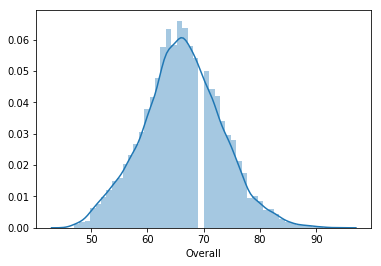

In [20]:
sns.distplot(fifa_data['Overall'])

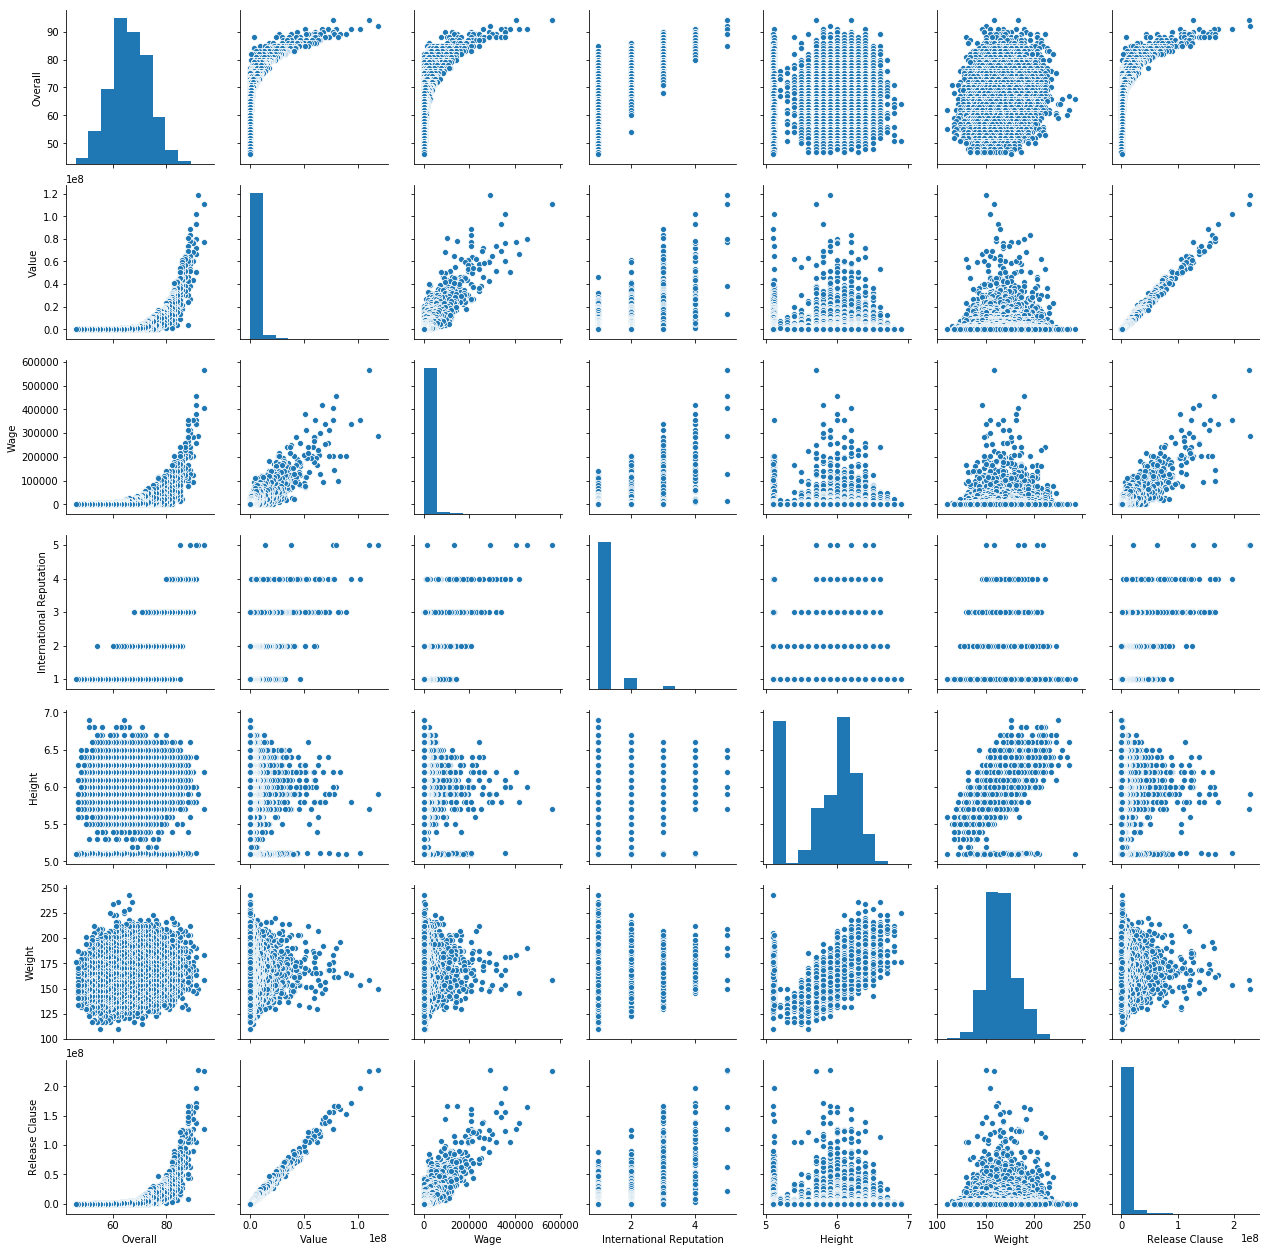

In [23]:
sns.pairplot( data = fifa_data, vars = ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause'])

In [39]:
fifa_data.sort_values(by = 'Overall', ascending = False)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0


In [41]:
fifa_20 = fifa_data[fifa_data['Contract Valid Until']<='2020'].head(20)
fifa_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0


In [42]:
fifa_20['Wage'].mean()

209350.0

In [53]:
fifa_20['Age'].mean()

30.85

In [54]:
fifa_20['Overall'].corr(fifa_20['Value'])

0.6341528413844186

In [117]:
#SPLITTING TABLE ON THE BASIS OF POSITION AND GETTING TOP 5 PLAYERS AT RACH POSITION

In [56]:
position1 = fifa_data[fifa_data['Position']=='RF'].head(5)
position1

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0
528,172114,D. Valeri,32,Argentina,80,80,Portland Timbers,11500000.0,12000.0,Right,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17300000.0
890,150516,L. Podolski,33,Germany,78,78,Vissel Kobe,6500000.0,11000.0,Left,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8100000.0
1774,201313,C. Ciano,28,Italy,75,75,Frosinone,6500000.0,17000.0,Left,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11700000.0


In [57]:
position2 = fifa_data[fifa_data['Position']=='ST'].head(5)
position2

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,Left,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0


In [58]:
position3 = fifa_data[fifa_data['Position']=='LW'].head(5)
position3

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
29,198219,L. Insigne,27,Italy,88,88,Napoli,62000000.0,165000.0,Right,...,83.0,51.0,24.0,22.0,8.0,4.0,14.0,9.0,10.0,105400000.0
30,197781,Isco,26,Spain,88,91,Real Madrid,73500000.0,315000.0,Right,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156200000.0
32,189242,Coutinho,26,Brazil,88,89,FC Barcelona,69500000.0,340000.0,Right,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,147700000.0
55,222492,L. Sané,22,Germany,86,92,Manchester City,61000000.0,195000.0,Left,...,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,125100000.0


In [59]:
position4 = fifa_data[fifa_data['Position']=='GK'].head(5)
position4

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
18,192448,M. ter Stegen,26,Germany,89,92,FC Barcelona,58000000.0,240000.0,Right,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000.0
19,192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500000.0,240000.0,Left,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000.0
22,167495,M. Neuer,32,Germany,89,89,FC Bayern München,38000000.0,130000.0,Right,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62700000.0


In [62]:
position5 = fifa_data[fifa_data['Position']=='RCM'].head(5)
position5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
53,168651,I. Rakitić,30,Croatia,87,87,FC Barcelona,46500000.0,260000.0,Right,...,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,95300000.0
82,212622,J. Kimmich,23,Germany,85,88,FC Bayern München,40500000.0,92000.0,Right,...,82.0,75.0,81.0,79.0,8.0,15.0,7.0,15.0,15.0,69900000.0
83,208421,Saúl,23,Spain,85,90,Atlético Madrid,50500000.0,77000.0,Left,...,83.0,77.0,79.0,76.0,7.0,13.0,12.0,10.0,9.0,107300000.0


In [63]:
position6 = fifa_data[fifa_data['Position']=='LF'].head(5)
position6

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
76,41,Iniesta,34,Spain,86,86,Vissel Kobe,21500000.0,21000.0,Right,...,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0,26900000.0
272,198164,Jonathan Viera,28,Spain,82,82,Beijing Sinobo Guoan FC,22500000.0,31000.0,Right,...,80.0,56.0,68.0,55.0,16.0,16.0,9.0,14.0,9.0,49500000.0
1379,190577,S. Blanco,30,Argentina,76,76,Portland Timbers,7500000.0,9000.0,Right,...,65.0,30.0,22.0,32.0,9.0,7.0,9.0,13.0,12.0,11300000.0


In [64]:
position7 = fifa_data[fifa_data['Position']=='RS'].head(5)
position7

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14000000.0,15000.0,Right,...,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,21000000.0
148,167397,Falcao,32,Colombia,84,84,AS Monaco,25000000.0,115000.0,Right,...,87.0,39.0,42.0,19.0,10.0,13.0,6.0,9.0,5.0,47500000.0
267,199451,W. Ben Yedder,27,France,82,82,Sevilla FC,23500000.0,28000.0,Right,...,84.0,34.0,33.0,26.0,6.0,13.0,9.0,7.0,7.0,49400000.0
403,159261,F. Quagliarella,35,Italy,81,81,Sampdoria,8000000.0,39000.0,Right,...,81.0,35.0,21.0,15.0,6.0,7.0,5.0,4.0,4.0,13600000.0


In [65]:
position8 = fifa_data[fifa_data['Position']=='RCB'].head(5)
position8

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
54,152729,Piqué,31,Spain,87,87,FC Barcelona,34000000.0,240000.0,Right,...,86.0,91.0,86.0,84.0,10.0,11.0,14.0,15.0,8.0,69700000.0
62,201535,R. Varane,25,France,86,91,Real Madrid,50000000.0,210000.0,Right,...,82.0,87.0,88.0,87.0,11.0,11.0,9.0,5.0,14.0,106300000.0
70,184344,L. Bonucci,31,Italy,86,86,Juventus,30000000.0,160000.0,Right,...,86.0,90.0,86.0,80.0,2.0,2.0,3.0,2.0,4.0,49500000.0


In [66]:
position9 = fifa_data[fifa_data['Position']=='LCM'].head(5)
position9

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,Right,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
52,171877,M. Hamšík,30,Slovakia,87,87,Napoli,46500000.0,125000.0,Right,...,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,79100000.0
63,199556,M. Verratti,25,Italy,86,89,Paris Saint-Germain,55000000.0,135000.0,Right,...,93.0,78.0,83.0,80.0,12.0,12.0,15.0,15.0,10.0,105900000.0
114,212198,Bruno Fernandes,23,Portugal,84,88,Sporting CP,40500000.0,22000.0,Right,...,83.0,63.0,66.0,53.0,12.0,14.0,15.0,8.0,14.0,84000000.0


In [68]:
position10 = fifa_data[fifa_data['Position']=='CB'].head(5)
position10

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
42,205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,Left,...,82.0,90.0,89.0,86.0,15.0,10.0,14.0,12.0,15.0,121100000.0
73,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,160000.0,Right,...,82.0,89.0,87.0,85.0,7.0,4.0,8.0,7.0,11.0,49500000.0
89,192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000.0,170000.0,Right,...,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,52700000.0
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000.0,38000.0,Right,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,15300000.0


In [69]:
position11 = fifa_data[fifa_data['Position']=='LDM'].head(5)
position11

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
14,215914,N. Kanté,27,France,89,90,Chelsea,63000000.0,225000.0,Right,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000.0
119,207865,Marquinhos,24,Brazil,84,89,Paris Saint-Germain,35500000.0,90000.0,Right,...,79.0,85.0,87.0,87.0,6.0,6.0,12.0,10.0,13.0,68300000.0
217,176266,Lucas Leiva,31,Brazil,83,83,Lazio,17500000.0,64000.0,Right,...,86.0,82.0,82.0,78.0,10.0,8.0,8.0,5.0,6.0,29800000.0
323,228702,F. de Jong,21,Netherlands,81,89,Ajax,26000000.0,19000.0,Right,...,86.0,69.0,73.0,70.0,7.0,13.0,10.0,10.0,9.0,41600000.0
331,216451,J. Seri,26,Ivory Coast,81,82,Fulham,20500000.0,73000.0,Right,...,83.0,69.0,73.0,65.0,14.0,13.0,9.0,10.0,12.0,40500000.0


In [70]:
position12 = fifa_data[fifa_data['Position']=='CAM'].head(5)
position12

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
61,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
66,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0


In [71]:
position13 = fifa_data[fifa_data['Position']=='CDM'].head(5)
position13

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
20,189511,Sergio Busquets,29,Spain,89,89,FC Barcelona,51500000.0,315000.0,Right,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,105600000.0
27,200145,Casemiro,26,Brazil,88,90,Real Madrid,59500000.0,285000.0,Right,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,126400000.0
72,180206,M. Pjanić,28,Bosnia Herzegovina,86,86,Juventus,44000000.0,180000.0,Right,...,86.0,75.0,74.0,70.0,7.0,7.0,13.0,7.0,8.0,72600000.0
75,135507,Fernandinho,33,Brazil,86,86,Manchester City,18000000.0,185000.0,Right,...,79.0,85.0,85.0,80.0,12.0,11.0,5.0,13.0,7.0,33300000.0
118,209499,Fabinho,24,Brazil,84,88,Liverpool,34000000.0,120000.0,Right,...,84.0,83.0,86.0,84.0,13.0,12.0,6.0,8.0,8.0,67200000.0


In [72]:
position14 = fifa_data[fifa_data['Position']=='LS'].head(5)
position14

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
100,179844,Diego Costa,29,Spain,85,85,Atlético Madrid,38500000.0,100000.0,Right,...,83.0,58.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,78900000.0
151,143076,A. Gómez,30,Argentina,84,84,Atalanta,30000000.0,53000.0,Right,...,84.0,50.0,30.0,34.0,8.0,11.0,12.0,9.0,6.0,51000000.0
174,208093,Gerard Moreno,26,Spain,83,85,Villarreal CF,32000000.0,53000.0,Left,...,72.0,43.0,41.0,41.0,15.0,12.0,7.0,12.0,10.0,69600000.0
206,186627,M. Balotelli,27,Italy,83,83,OGC Nice,27500000.0,55000.0,Right,...,81.0,10.0,22.0,20.0,2.0,2.0,2.0,4.0,2.0,52300000.0


In [73]:
position15 = fifa_data[fifa_data['Position']=='LCB'].head(5)
position15

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
34,178603,M. Hummels,29,Germany,88,88,FC Bayern München,46000000.0,160000.0,Right,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,75900000.0
44,201024,K. Koulibaly,27,Senegal,87,90,Napoli,51000000.0,115000.0,Right,...,78.0,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,90500000.0
51,172871,J. Vertonghen,31,Belgium,87,87,Tottenham Hotspur,34000000.0,155000.0,Left,...,83.0,90.0,87.0,88.0,6.0,10.0,9.0,12.0,7.0,62900000.0
59,203376,V. van Dijk,26,Netherlands,86,88,Liverpool,44500000.0,165000.0,Right,...,83.0,88.0,89.0,84.0,13.0,10.0,13.0,11.0,11.0,87900000.0


In [74]:
position16 = fifa_data[fifa_data['Position']=='RM'].head(5)
position16

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,Right,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,166100000.0
26,209331,M. Salah,26,Egypt,88,89,Liverpool,69500000.0,255000.0,Left,...,91.0,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,137300000.0
122,204970,F. Thauvin,25,France,84,87,Olympique de Marseille,39000000.0,72000.0,Left,...,82.0,46.0,29.0,31.0,8.0,11.0,14.0,10.0,9.0,77000000.0
137,185020,José Callejón,31,Spain,84,84,Napoli,27500000.0,105000.0,Right,...,79.0,64.0,32.0,32.0,8.0,5.0,14.0,11.0,11.0,46800000.0
138,183898,A. Di María,30,Argentina,84,84,Paris Saint-Germain,29500000.0,125000.0,Left,...,82.0,35.0,59.0,56.0,10.0,7.0,11.0,12.0,11.0,54600000.0


In [75]:
position17 = fifa_data[fifa_data['Position']=='LM'].head(5)
position17

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
33,188567,P. Aubameyang,29,Gabon,88,88,Arsenal,59000000.0,265000.0,Right,...,86.0,27.0,25.0,36.0,6.0,9.0,15.0,9.0,9.0,112100000.0
58,208722,S. Mané,26,Senegal,86,87,Liverpool,52000000.0,195000.0,Right,...,80.0,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,102700000.0
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,46500000.0,175000.0,Left,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,76700000.0
68,188350,M. Reus,29,Germany,86,86,Borussia Dortmund,43500000.0,100000.0,Right,...,84.0,47.0,36.0,45.0,12.0,12.0,13.0,13.0,11.0,74000000.0
86,193747,Koke,26,Spain,85,86,Atlético Madrid,45000000.0,88000.0,Right,...,78.0,80.0,69.0,51.0,14.0,12.0,5.0,10.0,13.0,95600000.0


In [76]:
position18 = fifa_data[fifa_data['Position']=='LB'].head(5)
position18

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
35,176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000.0,285000.0,Left,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000.0
49,189332,Jordi Alba,29,Spain,87,87,FC Barcelona,38000000.0,250000.0,Left,...,79.0,72.0,84.0,85.0,13.0,15.0,13.0,6.0,13.0,77900000.0
64,191043,Alex Sandro,27,Brazil,86,86,Juventus,36500000.0,160000.0,Left,...,82.0,81.0,84.0,84.0,7.0,7.0,9.0,12.0,5.0,60200000.0
85,197445,D. Alaba,26,Austria,85,87,FC Bayern München,38000000.0,110000.0,Left,...,79.0,80.0,82.0,80.0,5.0,7.0,14.0,15.0,9.0,65600000.0
106,164169,Filipe Luís,32,Brazil,85,85,Atlético Madrid,21500000.0,81000.0,Left,...,88.0,78.0,84.0,86.0,11.0,15.0,9.0,9.0,5.0,44100000.0


In [77]:
position19 = fifa_data[fifa_data['Position']=='RDM'].head(5)
position19

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
45,195864,P. Pogba,25,France,87,91,Manchester United,64000000.0,210000.0,Right,...,87.0,66.0,70.0,68.0,5.0,6.0,2.0,4.0,3.0,123200000.0
134,190584,Illarramendi,28,Spain,84,84,Real Sociedad,31000000.0,51000.0,Right,...,79.0,69.0,83.0,80.0,15.0,7.0,11.0,14.0,12.0,65100000.0
198,193474,I. Gueye,28,Senegal,83,83,Everton,21000000.0,125000.0,Right,...,80.0,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,39900000.0
223,53302,D. De Rossi,34,Italy,83,83,Roma,8000000.0,80000.0,Right,...,87.0,90.0,82.0,80.0,10.0,7.0,13.0,10.0,9.0,13600000.0
298,183498,M. Parolo,33,Italy,82,82,Lazio,9000000.0,59000.0,Right,...,78.0,78.0,80.0,82.0,13.0,9.0,6.0,7.0,9.0,15300000.0


In [78]:
position20 = fifa_data[fifa_data['Position']=='RW'].head(5)
position20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
56,218667,Bernardo Silva,23,Portugal,86,91,Manchester City,59500000.0,180000.0,Left,...,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,114500000.0
60,202652,R. Sterling,23,England,86,89,Manchester City,56500000.0,195000.0,Right,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,108800000.0
79,220834,Marco Asensio,22,Spain,85,92,Real Madrid,54000000.0,215000.0,Left,...,83.0,40.0,42.0,39.0,13.0,9.0,6.0,12.0,10.0,121500000.0
84,204485,R. Mahrez,27,Algeria,85,85,Manchester City,40500000.0,205000.0,Left,...,86.0,45.0,31.0,18.0,15.0,9.0,13.0,11.0,6.0,74900000.0
93,184941,A. Sánchez,29,Chile,85,85,Manchester United,37500000.0,215000.0,Right,...,84.0,38.0,44.0,35.0,10.0,10.0,15.0,12.0,13.0,69400000.0


In [79]:
position21 = fifa_data[fifa_data['Position']=='CM'].head(5)
position21

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
67,189509,Thiago,27,Spain,86,86,FC Bayern München,45500000.0,130000.0,Right,...,85.0,67.0,63.0,65.0,6.0,11.0,7.0,9.0,13.0,75100000.0
78,223848,S. Milinković-Savić,23,Serbia,85,90,Lazio,50500000.0,73000.0,Right,...,82.0,75.0,77.0,72.0,7.0,10.0,7.0,16.0,7.0,89600000.0
121,205498,Jorginho,26,Italy,84,87,Chelsea,38000000.0,155000.0,Right,...,79.0,63.0,78.0,70.0,14.0,7.0,13.0,14.0,8.0,73200000.0
136,186942,I. Gündoğan,27,Germany,84,84,Manchester City,32000000.0,175000.0,Right,...,87.0,73.0,68.0,64.0,11.0,14.0,5.0,5.0,13.0,59200000.0
161,220971,N. Keïta,23,Guinea,83,88,Liverpool,34000000.0,120000.0,Right,...,79.0,68.0,62.0,61.0,7.0,14.0,15.0,14.0,9.0,67200000.0


In [80]:
position22 = fifa_data[fifa_data['Position']=='RB'].head(5)
position22

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
69,184432,Azpilicueta,28,Spain,86,86,Chelsea,35000000.0,175000.0,Right,...,78.0,88.0,90.0,86.0,13.0,9.0,10.0,6.0,5.0,64800000.0
123,204963,Carvajal,26,Spain,84,87,Real Madrid,31500000.0,185000.0,Right,...,77.0,83.0,83.0,85.0,13.0,13.0,15.0,9.0,15.0,66900000.0
135,188377,K. Walker,28,England,84,84,Manchester City,24500000.0,165000.0,Right,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,45300000.0
192,199564,Sergi Roberto,26,Spain,83,86,FC Barcelona,26500000.0,170000.0,Right,...,76.0,75.0,83.0,83.0,14.0,16.0,11.0,15.0,10.0,56300000.0
216,177457,L. Bender,29,Germany,83,83,Bayer 04 Leverkusen,20000000.0,82000.0,Right,...,83.0,88.0,86.0,82.0,12.0,6.0,7.0,12.0,7.0,34000000.0


In [81]:
position23 = fifa_data[fifa_data['Position']=='RAM'].head(5)
position23

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
129,193082,J. Cuadrado,30,Colombia,84,84,Juventus,29500000.0,150000.0,Right,...,80.0,63.0,70.0,74.0,5.0,5.0,13.0,6.0,9.0,48700000.0
171,208670,H. Ziyech,25,Morocco,83,86,Ajax,32500000.0,28000.0,Left,...,83.0,52.0,66.0,36.0,11.0,7.0,11.0,8.0,14.0,47900000.0
1705,230465,Allan Bardinho,26,Brazil,75,75,Botafogo,7000000.0,22000.0,Left,...,71.0,23.0,33.0,32.0,12.0,8.0,17.0,8.0,15.0,13300000.0
2242,230483,Jacson Zonta,34,Brazil,74,74,Vitória,2800000.0,13000.0,Right,...,66.0,31.0,21.0,22.0,8.0,14.0,9.0,9.0,12.0,5400000.0
2322,230267,Sebas Couteira,30,Brazil,74,74,Atlético Paranaense,5500000.0,14000.0,Right,...,71.0,32.0,52.0,41.0,15.0,13.0,12.0,10.0,9.0,10500000.0


In [82]:
position24 = fifa_data[fifa_data['Position']=='CF'].head(5)
position24

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,198706,Luis Alberto,25,Spain,82,85,Lazio,28500000.0,67000.0,Right,...,72.0,44.0,25.0,18.0,6.0,8.0,6.0,12.0,11.0,50600000.0
293,184431,S. Giovinco,31,Italy,82,82,Toronto FC,20000000.0,15000.0,Right,...,82.0,23.0,29.0,28.0,6.0,3.0,6.0,3.0,3.0,30000000.0
350,205175,A. Milik,24,Poland,81,88,Napoli,25500000.0,71000.0,Left,...,72.0,35.0,34.0,32.0,9.0,16.0,16.0,15.0,6.0,48500000.0
382,187072,L. Stindl,29,Germany,81,81,Borussia Mönchengladbach,18000000.0,43000.0,Right,...,83.0,59.0,61.0,50.0,7.0,10.0,13.0,11.0,12.0,30600000.0
407,144622,Raffael,33,Brazil,81,81,Borussia Mönchengladbach,11000000.0,41000.0,Right,...,79.0,43.0,42.0,31.0,12.0,10.0,5.0,13.0,14.0,18700000.0


In [83]:
position25 = fifa_data[fifa_data['Position']=='LAM'].head(5)
position25

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
365,199434,D. Tadić,29,Serbia,81,81,Ajax,17500000.0,26000.0,Left,...,82.0,46.0,34.0,26.0,11.0,11.0,14.0,9.0,16.0,24500000.0
1587,230408,Fabrio Farinha,26,Brazil,75,75,Atlético Mineiro,7000000.0,31000.0,Left,...,76.0,23.0,56.0,48.0,8.0,15.0,11.0,7.0,15.0,13300000.0
2247,230487,Leo Caldeirinha,34,Brazil,74,74,Vitória,2800000.0,13000.0,Left,...,76.0,25.0,24.0,22.0,18.0,16.0,13.0,15.0,15.0,5400000.0
2342,230276,Nicolás Formido,30,Brazil,74,74,Internacional,5500000.0,23000.0,Left,...,72.0,18.0,29.0,21.0,9.0,8.0,8.0,7.0,12.0,10500000.0
3356,227886,D. Buitrago,27,Colombia,72,73,América de Cali,3600000.0,2000.0,Left,...,68.0,13.0,22.0,26.0,8.0,14.0,6.0,6.0,12.0,5100000.0


In [84]:
position26 = fifa_data[fifa_data['Position']=='RWB'].head(5)
position26

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
450,207862,M. Ginter,24,Germany,80,82,Borussia Mönchengladbach,15500000.0,28000.0,Right,...,71.0,82.0,84.0,77.0,12.0,10.0,6.0,8.0,10.0,27500000.0
465,203605,P. Kadeřábek,26,Czech Republic,80,81,TSG 1899 Hoffenheim,14000000.0,39000.0,Right,...,78.0,72.0,79.0,76.0,10.0,11.0,14.0,13.0,7.0,24900000.0
517,180216,S. Coleman,29,Republic of Ireland,80,80,Everton,11000000.0,97000.0,Right,...,82.0,78.0,84.0,82.0,5.0,15.0,10.0,13.0,7.0,20900000.0
652,197083,D. Caligiuri,30,Italy,79,79,FC Schalke 04,9000000.0,33000.0,Right,...,76.0,70.0,72.0,68.0,12.0,10.0,13.0,6.0,14.0,15300000.0
766,221342,Pablo Maffeo,20,Spain,78,86,VfB Stuttgart,13000000.0,24000.0,Right,...,62.0,76.0,81.0,80.0,10.0,7.0,14.0,12.0,15.0,24700000.0


In [85]:
position27 = fifa_data[fifa_data['Position']=='LWB'].head(5)
position27

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
474,200536,N. Schulz,25,Germany,80,81,TSG 1899 Hoffenheim,14500000.0,37000.0,Left,...,75.0,74.0,76.0,77.0,13.0,9.0,15.0,7.0,14.0,25700000.0
581,223682,Granell,29,Spain,79,79,Girona FC,12000000.0,37000.0,Left,...,69.0,55.0,75.0,65.0,6.0,13.0,13.0,14.0,14.0,25200000.0
605,208334,J. Hector,28,Germany,79,79,1. FC Köln,10000000.0,26000.0,Left,...,78.0,76.0,79.0,79.0,9.0,10.0,10.0,12.0,14.0,15000000.0
787,214026,J. Mojica,25,Colombia,78,81,Girona FC,10500000.0,28000.0,Left,...,69.0,67.0,78.0,79.0,13.0,8.0,14.0,9.0,15.0,22800000.0
797,212187,P. Max,24,Germany,78,81,FC Augsburg,11000000.0,22000.0,Left,...,71.0,69.0,74.0,75.0,15.0,12.0,11.0,8.0,11.0,19500000.0


In [87]:
reduce(np.intersect1d, [position1.Name, position2.Name, position3.Name,position4.Name,position5.Name,position6.Name,position7.Name,position8.Name,position9.Name,position10.Name,position11.Name,position12.Name,position13.Name,position14.Name,position15.Name,position16.Name,position17.Name,position18.Name,position19.Name,position20.Name,position21.Name,position22.Name,position23.Name,position24.Name,position25.Name,position26.Name,position27.Name])

array([], dtype=object)

mean of wage for every table(TO BE IN TOP 5)

In [89]:
position1['Wage'].mean() #average needed to be in top5 in LW

148000.0

In [90]:
position2['Wage'].mean() #average needed to be in top5 in GK

294000.0

In [91]:
position3['Wage'].mean() #average needed to be in top5 in ST

261000.0

In [92]:
position4['Wage'].mean()  #average needed to be in top5 in RCM 

192800.0

In [93]:
position5['Wage'].mean()  #average needed to be in top5 in LF

240800.0

In [94]:
position6['Wage'].mean()  #average needed to be in top5 in RS

121200.0

In [95]:
position7['Wage'].mean()  #average needed to be in top5 in RCB

130400.0

In [96]:
position8['Wage'].mean()  #average needed to be in top5 in LCM

231000.0

In [97]:
position9['Wage'].mean()  #average needed to be in top5 in CD

184400.0

In [98]:
position10['Wage'].mean()  #average needed to be in top5 in LDM

139600.0

In [99]:
position11['Wage'].mean()  #average needed to be in top5 in CAM

94200.0

In [100]:
position12['Wage'].mean()  #average needed to be in top5 in CDM

174000.0

In [101]:
position13['Wage'].mean()  #average needed to be in top5 in LS

217000.0

In [102]:
position14['Wage'].mean()  #average needed to be in top5 in LCB

92200.0

In [104]:
position15['Wage'].mean()  #average needed to be in top5 in RM

162000.0

In [105]:
position16['Wage'].mean()  #average needed to be in top5 in LM

131400.0

In [106]:
position17['Wage'].mean()  #average needed to be in top5 in LB

164600.0

In [107]:
position18['Wage'].mean()  #average needed to be in top5 in RDM

177200.0

In [108]:
position19['Wage'].mean()  #average needed to be in top5 in RW

105000.0

In [109]:
position20['Wage'].mean()  #average needed to be in top5 in CM

202000.0

In [110]:
position21['Wage'].mean()  #average needed to be in top5 in RB

130600.0

In [111]:
position22['Wage'].mean()  #average needed to be in top5 in RAM

155400.0

In [112]:
position23['Wage'].mean()  #average needed to be in top5 in CF

45400.0

In [113]:
position24['Wage'].mean()  #average needed to be in top5 in LAM

47400.0

In [114]:
position25['Wage'].mean()  #average needed to be in top5 in RWB

19000.0

In [115]:
position26['Wage'].mean()  #average needed to be in top5 in LWB

44200.0

In [116]:
position27['Wage'].mean()  #average needed to be in top5 in RF

30000.0